In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("international-airline-passengers.csv",skipfooter=2)

<ipython-input-2-491b54da4ab2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df=pd.read_csv("international-airline-passengers.csv",skipfooter=2)


In [3]:
df.shape

(144, 2)

In [4]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Month                                                                           144 non-null    object
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df["Month"]=pd.to_datetime(df["Month"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   Month                                                                           144 non-null    datetime64[ns]
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
df.columns=["Month","volume"]

In [11]:
df=df.set_index("Month")

In [12]:
df.head()

,volume
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


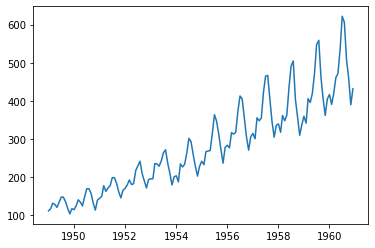

In [13]:
plt.plot(df)
plt.show()

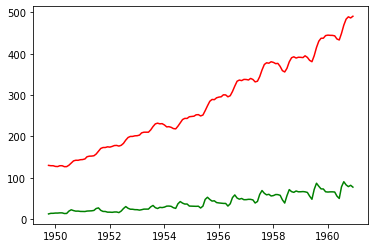

In [14]:
rolling_mean=df.rolling(10).mean()
rolling_std=df.rolling(10).std()
plt.plot(rolling_mean,c='r')
plt.plot(rolling_std,c='g')
plt.show()

#dicky fuller test
pvalue>0.05 -- null hypothesis data is not stationary
pval<0.05 -- data is stationary

In [15]:
from statsmodels.tsa.stattools import adfuller
adfuller(df["volume"])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

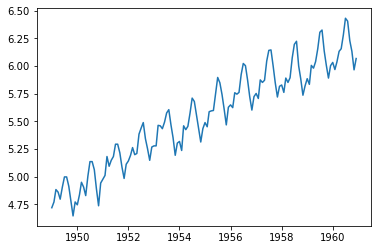

In [16]:
dflog=np.log(df)
plt.plot(dflog)
plt.show()

In [17]:
dflog=dflog-dflog.shift(1)
dflog.head()

,volume
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022


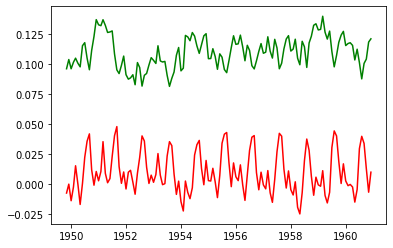

In [18]:
rolling_mean1=dflog.rolling(10).mean()
rolling_std1=dflog.rolling(10).std()
plt.plot(rolling_mean1,c='r')
plt.plot(rolling_std1,c='g')
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(dflog["volume"].dropna())

In [20]:
def adfuller_test(volume):
    result=adfuller(volume)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [21]:
adfuller_test(df["volume"])

ADF Test Statistic : 0.8153688792060543
p-value : 0.9918802434376411
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [22]:
df['volume First Difference'] = df['volume'] - df['volume'].shift(1)

In [23]:
df['volume'].shift(1)

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: volume, Length: 144, dtype: float64

In [24]:
df['volume second Difference']=df['volume']-df['volume'].shift(12)

In [25]:
df.head(14)

,volume,volume First Difference,volume second Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
1949-06-01,135,14.0,NaN
1949-07-01,148,13.0,NaN
1949-08-01,148,0.0,NaN
1949-09-01,136,-12.0,NaN


In [26]:
adfuller_test(df['volume second Difference'].dropna())

ADF Test Statistic : -3.3830207264924805
p-value : 0.011551493085514982
#Lags Used : 1
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

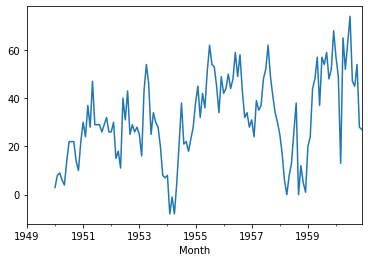

In [27]:
df['volume second Difference'].plot()

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [29]:
import statsmodels.api as sm

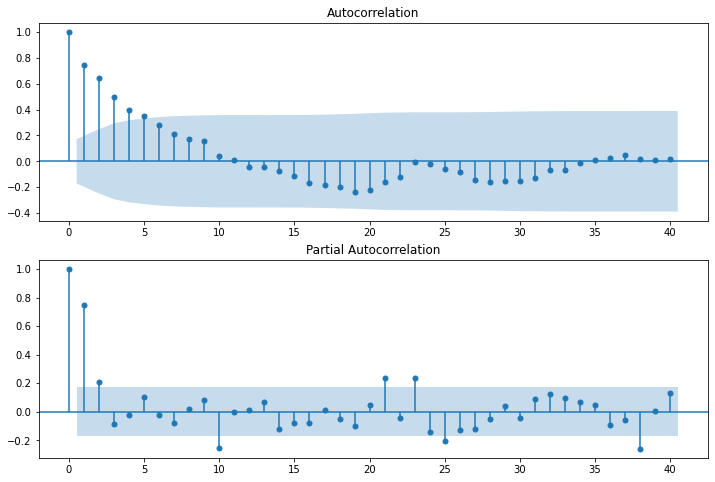

In [30]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['volume second Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['volume second Difference'].iloc[13:],lags=40,ax=ax2)

In [31]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
model=ARIMA(df['volume'],order=(1,1,1))
model_fit=model.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.volume   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Mon, 05 Apr 2021   AIC                           1402.145
Time:                        12:57:55   BIC                           1413.997
Sample:                    02-01-1949   HQIC                          1406.961
                         - 12-01-1960                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.volume     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.volume    -1.0000      0.019    -53.425      0.000      -1.037      -0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3513           +0.0000j            1.3513            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

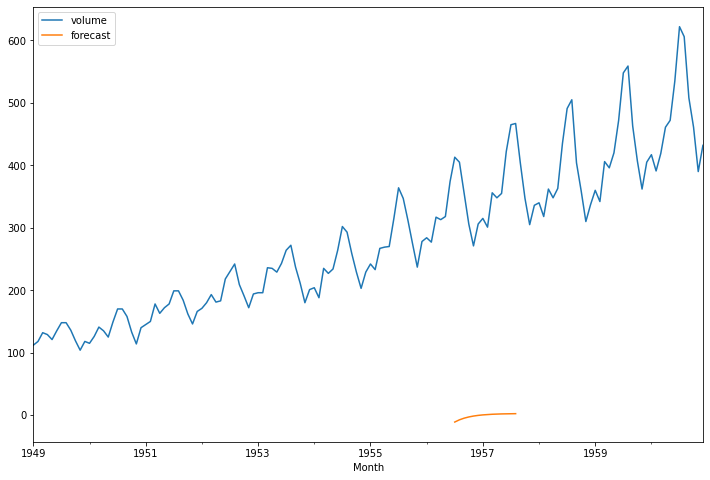

In [34]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['volume','forecast']].plot(figsize=(12,8))

In [35]:
model=sm.tsa.statespace.SARIMAX(df['volume'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

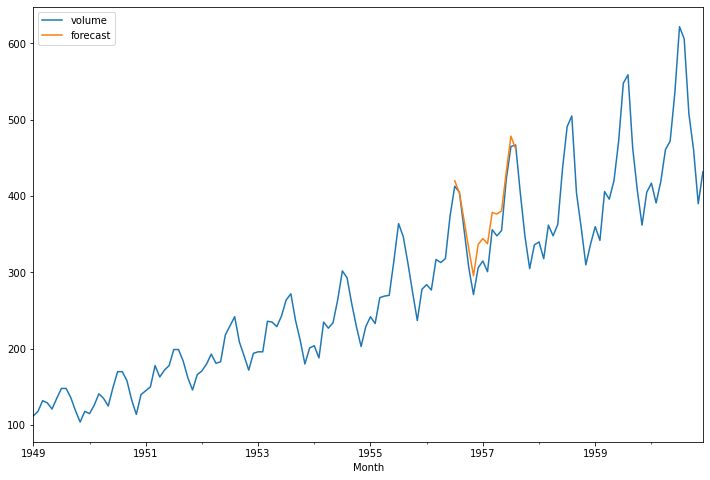

In [36]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['volume','forecast']].plot(figsize=(12,8))

In [37]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [38]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [39]:
future_datest_df.tail()

,volume,volume First Difference,volume second Difference,forecast
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN,NaN


In [40]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

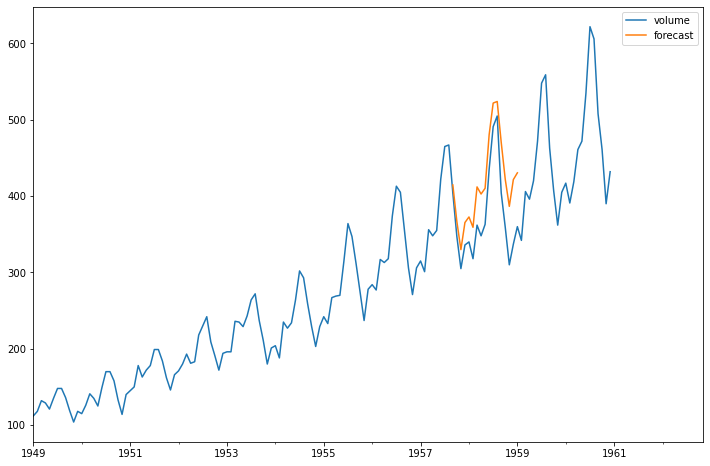

In [42]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['volume', 'forecast']].plot(figsize=(12, 8)) 